# Dirty Cafe Sales: Data Cleaning and Data analysis using Pandas 

In [8]:
import pandas as pd
import numpy as np
df = pd.read_csv("dirty_cafe_sales.csv")
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2,2.0,4.0,NaN,UNKNOWN,2023-08-30
9996,TXN_9659401,NaN,3,NaN,3.0,Digital Wallet,NaN,2023-06-02
9997,TXN_5255387,Coffee,4,2.0,8.0,Digital Wallet,NaN,2023-03-02
9998,TXN_7695629,Cookie,3,NaN,3.0,Digital Wallet,NaN,2023-12-02


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [11]:
# Before deleting any NaN values and some special values like 'ERROR' & 'UNKNOWN' 
# Lets change the datatype first.

df['Item'] = df['Item'].replace(['ERROR','UNKNOWN'], np.nan)
df['Item'] = df['Item'].astype(str)

df['Quantity'] = df['Quantity'].replace(['ERROR','UNKNOWN'], np.nan)
df['Quantity'] = df['Quantity'].astype(float)

df['Price Per Unit'] = df['Price Per Unit'].replace(['ERROR','UNKNOWN'], np.nan)
df['Price Per Unit'] = df['Price Per Unit'].astype(float)

df['Total Spent'] = df['Total Spent'].replace(['ERROR','UNKNOWN'], np.nan)
df['Total Spent'] = df['Total Spent'].astype(float)

df['Transaction Date'] = df['Transaction Date'].replace(['ERROR','UNKNOWN'], np.nan)
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], format='%Y-%m-%d')
# df['date_column'] = pd.to_datetime(df['date_column'], format='%Y-%m-%d')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    10000 non-null  object        
 1   Item              10000 non-null  object        
 2   Quantity          9521 non-null   float64       
 3   Price Per Unit    9467 non-null   float64       
 4   Total Spent       9498 non-null   float64       
 5   Payment Method    7421 non-null   object        
 6   Location          6735 non-null   object        
 7   Transaction Date  9540 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 625.1+ KB


In [12]:
df.sample(10)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
123,TXN_6258471,Coffee,5.0,2.0,10.0,Digital Wallet,In-store,2023-09-23
182,TXN_8007337,Cake,2.0,3.0,6.0,Digital Wallet,Takeaway,2023-11-01
7414,TXN_5790078,Juice,4.0,3.0,12.0,Digital Wallet,Takeaway,2023-04-16
4070,TXN_4767006,Cake,1.0,3.0,3.0,Cash,Takeaway,2023-08-23
7574,TXN_6223157,Salad,1.0,5.0,5.0,ERROR,Takeaway,2023-09-13
8811,TXN_7495804,Juice,3.0,3.0,9.0,Credit Card,Takeaway,2023-11-24
4660,TXN_9799633,Juice,4.0,3.0,12.0,Cash,In-store,2023-11-07
1885,TXN_7844687,Cake,1.0,3.0,3.0,NaN,In-store,NaT
3170,TXN_1937611,Tea,2.0,NaN,3.0,Credit Card,Takeaway,2023-11-02
8400,TXN_1967032,Tea,1.0,1.5,1.5,Digital Wallet,Takeaway,2023-01-12


In [14]:
categorical_columns = ['Item','Price Per Unit','Total Spent', 'Payment Method', 'Location']
for column in categorical_columns:
    print(f"\nValue counts for '{column}':")
    print(df[column].value_counts(dropna=False))


Value counts for 'Item':
Item
Juice       1171
Coffee      1165
Salad       1148
Cake        1139
Sandwich    1131
Smoothie    1096
Cookie      1092
Tea         1089
nan          969
Name: count, dtype: int64

Value counts for 'Price Per Unit':
Price Per Unit
3.0    2429
4.0    2331
2.0    1227
5.0    1204
1.0    1143
1.5    1133
NaN     533
Name: count, dtype: int64

Value counts for 'Total Spent':
Total Spent
6.0     979
12.0    939
3.0     930
4.0     923
20.0    746
15.0    734
8.0     677
10.0    524
NaN     502
2.0     497
9.0     479
5.0     468
16.0    444
25.0    259
7.5     237
1.0     232
4.5     225
1.5     205
Name: count, dtype: int64

Value counts for 'Payment Method':
Payment Method
NaN               2579
Digital Wallet    2291
Credit Card       2273
Cash              2258
ERROR              306
UNKNOWN            293
Name: count, dtype: int64

Value counts for 'Location':
Location
NaN         3265
Takeaway    3022
In-store    3017
ERROR        358
UNKNOWN      338
Nam

In [15]:
df['Payment Method'] = df['Payment Method'].replace(['ERROR','UNKNOWN'], np.nan)

In [16]:
df['Location'] = df['Location'].replace(['ERROR','UNKNOWN'], np.nan)

In [17]:
categorical_columns = ['Item','Price Per Unit','Total Spent', 'Payment Method', 'Location']
for column in categorical_columns:
    print(f"\nValue counts for '{column}':")
    print(df[column].value_counts(dropna=False))


Value counts for 'Item':
Item
Juice       1171
Coffee      1165
Salad       1148
Cake        1139
Sandwich    1131
Smoothie    1096
Cookie      1092
Tea         1089
nan          969
Name: count, dtype: int64

Value counts for 'Price Per Unit':
Price Per Unit
3.0    2429
4.0    2331
2.0    1227
5.0    1204
1.0    1143
1.5    1133
NaN     533
Name: count, dtype: int64

Value counts for 'Total Spent':
Total Spent
6.0     979
12.0    939
3.0     930
4.0     923
20.0    746
15.0    734
8.0     677
10.0    524
NaN     502
2.0     497
9.0     479
5.0     468
16.0    444
25.0    259
7.5     237
1.0     232
4.5     225
1.5     205
Name: count, dtype: int64

Value counts for 'Payment Method':
Payment Method
NaN               3178
Digital Wallet    2291
Credit Card       2273
Cash              2258
Name: count, dtype: int64

Value counts for 'Location':
Location
NaN         3961
Takeaway    3022
In-store    3017
Name: count, dtype: int64


In [18]:
df.isnull().sum()

Transaction ID         0
Item                   0
Quantity             479
Price Per Unit       533
Total Spent          502
Payment Method      3178
Location            3961
Transaction Date     460
dtype: int64

In [19]:
# Let's make a price dict
item_price = {
    'Coffee':2.0,
    'Tea':1.5,
    'Sandwich':4.0,
    'Salad':4.0,
    'Cake':3.0,
    'Cookie':1.0,
    'Smoothie':4.0,
    'Juice':3.0
}

# Reverse mapping (price to item)

price_item = {price: item for item, price in item_price.items()}

#Filling missing 'Item' values based on 'Price Per Unit'

df['Item'] = df['Item'].fillna(df['Price Per Unit'].map(price_item))

df.describe()

,Quantity,Price Per Unit,Total Spent,Transaction Date
count,9521.000000,9467.000000,9498.000000,9540
mean,3.028463,2.949984,8.924352,2023-07-01 23:00:31.698113280
min,1.000000,1.000000,1.000000,2023-01-01 00:00:00
25%,2.000000,2.000000,4.000000,2023-04-01 00:00:00
50%,3.000000,3.000000,8.000000,2023-07-02 00:00:00
75%,4.000000,4.000000,12.000000,2023-10-02 00:00:00
max,5.000000,5.000000,25.000000,2023-12-31 00:00:00
std,1.419007,1.278450,6.009919,NaN


In [20]:
df.isnull().sum()

Transaction ID         0
Item                   0
Quantity             479
Price Per Unit       533
Total Spent          502
Payment Method      3178
Location            3961
Transaction Date     460
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    10000 non-null  object        
 1   Item              10000 non-null  object        
 2   Quantity          9521 non-null   float64       
 3   Price Per Unit    9467 non-null   float64       
 4   Total Spent       9498 non-null   float64       
 5   Payment Method    6822 non-null   object        
 6   Location          6039 non-null   object        
 7   Transaction Date  9540 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 625.1+ KB


In [22]:
categorical_columns = ['Item','Price Per Unit','Total Spent', 'Payment Method', 'Location']
for column in categorical_columns:
    print(f"\nValue counts for '{column}':")
    print(df[column].value_counts(dropna=False))


Value counts for 'Item':
Item
Juice       1171
Coffee      1165
Salad       1148
Cake        1139
Sandwich    1131
Smoothie    1096
Cookie      1092
Tea         1089
nan          969
Name: count, dtype: int64

Value counts for 'Price Per Unit':
Price Per Unit
3.0    2429
4.0    2331
2.0    1227
5.0    1204
1.0    1143
1.5    1133
NaN     533
Name: count, dtype: int64

Value counts for 'Total Spent':
Total Spent
6.0     979
12.0    939
3.0     930
4.0     923
20.0    746
15.0    734
8.0     677
10.0    524
NaN     502
2.0     497
9.0     479
5.0     468
16.0    444
25.0    259
7.5     237
1.0     232
4.5     225
1.5     205
Name: count, dtype: int64

Value counts for 'Payment Method':
Payment Method
NaN               3178
Digital Wallet    2291
Credit Card       2273
Cash              2258
Name: count, dtype: int64

Value counts for 'Location':
Location
NaN         3961
Takeaway    3022
In-store    3017
Name: count, dtype: int64


In [23]:
df_cleaned = df.dropna(subset=['Transaction Date'], inplace=True)
df_cleaned

In [25]:
df_cleaned = df.dropna(subset=['Payment Method'], inplace=True)
df_cleaned

In [26]:
df_cleaned = df.dropna(subset=['Location'], inplace=True)
df_cleaned

In [27]:
categorical_columns = ['Item','Price Per Unit','Total Spent', 'Payment Method', 'Location']
for column in categorical_columns:
    print(f"\nValue counts for '{column}':")
    print(df[column].value_counts(dropna=False))



Value counts for 'Item':
Item
Salad       481
Juice       481
Cookie      465
Sandwich    461
Cake        442
Tea         429
Coffee      428
nan         395
Smoothie    393
Name: count, dtype: int64

Value counts for 'Price Per Unit':
Price Per Unit
3.0    973
4.0    900
5.0    507
1.0    489
2.0    453
1.5    446
NaN    207
Name: count, dtype: int64

Value counts for 'Total Spent':
Total Spent
6.0     401
12.0    382
4.0     366
3.0     357
20.0    298
15.0    281
8.0     257
10.0    208
2.0     198
5.0     194
9.0     193
NaN     185
16.0    177
25.0    111
7.5      95
1.0      94
4.5      94
1.5      84
Name: count, dtype: int64

Value counts for 'Payment Method':
Payment Method
Digital Wallet    1380
Cash              1303
Credit Card       1292
Name: count, dtype: int64

Value counts for 'Location':
Location
Takeaway    1993
In-store    1982
Name: count, dtype: int64


In [28]:
df.isnull().sum()

Transaction ID        0
Item                  0
Quantity            181
Price Per Unit      207
Total Spent         185
Payment Method        0
Location              0
Transaction Date      0
dtype: int64

In [29]:
df.dropna(subset=['Price Per Unit'], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3768 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    3768 non-null   object        
 1   Item              3768 non-null   object        
 2   Quantity          3592 non-null   float64       
 3   Price Per Unit    3768 non-null   float64       
 4   Total Spent       3593 non-null   float64       
 5   Payment Method    3768 non-null   object        
 6   Location          3768 non-null   object        
 7   Transaction Date  3768 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 264.9+ KB


In [30]:
df.isnull().sum()

Transaction ID        0
Item                  0
Quantity            176
Price Per Unit        0
Total Spent         175
Payment Method        0
Location              0
Transaction Date      0
dtype: int64

In [31]:
df.dropna(subset=['Quantity'], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3592 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    3592 non-null   object        
 1   Item              3592 non-null   object        
 2   Quantity          3592 non-null   float64       
 3   Price Per Unit    3592 non-null   float64       
 4   Total Spent       3427 non-null   float64       
 5   Payment Method    3592 non-null   object        
 6   Location          3592 non-null   object        
 7   Transaction Date  3592 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 252.6+ KB


In [32]:
df.isnull().sum()

Transaction ID        0
Item                  0
Quantity              0
Price Per Unit        0
Total Spent         165
Payment Method        0
Location              0
Transaction Date      0
dtype: int64

In [33]:
df.dropna(subset=['Total Spent'], inplace = True)
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 3427 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    3427 non-null   object        
 1   Item              3427 non-null   object        
 2   Quantity          3427 non-null   float64       
 3   Price Per Unit    3427 non-null   float64       
 4   Total Spent       3427 non-null   float64       
 5   Payment Method    3427 non-null   object        
 6   Location          3427 non-null   object        
 7   Transaction Date  3427 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 241.0+ KB


Transaction ID      0
Item                0
Quantity            0
Price Per Unit      0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
dtype: int64

In [34]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])
df['Day of the Week'] = df['Transaction Date'].dt.day_name()
df.info()



<class 'pandas.core.frame.DataFrame'>
Index: 3427 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    3427 non-null   object        
 1   Item              3427 non-null   object        
 2   Quantity          3427 non-null   float64       
 3   Price Per Unit    3427 non-null   float64       
 4   Total Spent       3427 non-null   float64       
 5   Payment Method    3427 non-null   object        
 6   Location          3427 non-null   object        
 7   Transaction Date  3427 non-null   datetime64[ns]
 8   Day of the Week   3427 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 267.7+ KB


In [35]:
df.sample(10)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,Day of the Week
3109,TXN_5086795,Salad,1.0,5.0,5.0,Cash,In-store,2023-04-29,Saturday
4811,TXN_8786159,Coffee,3.0,2.0,6.0,Cash,In-store,2023-04-05,Wednesday
8780,TXN_1903825,Salad,4.0,5.0,20.0,Digital Wallet,Takeaway,2023-04-01,Saturday
2288,TXN_8878830,Coffee,4.0,2.0,8.0,Credit Card,Takeaway,2023-10-11,Wednesday
4660,TXN_9799633,Juice,4.0,3.0,12.0,Cash,In-store,2023-11-07,Tuesday
2046,TXN_9853577,Sandwich,2.0,4.0,8.0,Credit Card,In-store,2023-04-30,Sunday
5481,TXN_5852244,Cake,2.0,3.0,6.0,Credit Card,Takeaway,2023-10-15,Sunday
415,TXN_1824506,Cake,1.0,3.0,3.0,Cash,In-store,2023-03-02,Thursday
572,TXN_4669664,Cookie,1.0,1.0,1.0,Digital Wallet,In-store,2023-12-21,Thursday
8897,TXN_5129701,Smoothie,2.0,4.0,8.0,Credit Card,Takeaway,2023-11-09,Thursday


In [37]:
df['Month'] = df['Transaction Date'].dt.month_name()
df.sample(10)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,Day of the Week,Month
506,TXN_3981449,Smoothie,2.0,4.0,8.0,Cash,In-store,2023-06-21,Wednesday,June
7485,TXN_7049861,Cake,5.0,3.0,15.0,Cash,In-store,2023-01-20,Friday,January
5092,TXN_3014261,Salad,4.0,5.0,20.0,Cash,In-store,2023-11-29,Wednesday,November
4250,TXN_5279972,Smoothie,4.0,4.0,16.0,Credit Card,Takeaway,2023-01-07,Saturday,January
4354,TXN_7738013,Salad,5.0,5.0,25.0,Credit Card,Takeaway,2023-11-28,Tuesday,November
6306,TXN_3134595,Juice,3.0,3.0,9.0,Credit Card,Takeaway,2023-02-25,Saturday,February
8244,TXN_7371782,Tea,3.0,1.5,4.5,Cash,In-store,2023-02-26,Sunday,February
4849,TXN_1186221,Salad,4.0,5.0,20.0,Cash,Takeaway,2023-04-21,Friday,April
6918,TXN_5549522,Juice,5.0,3.0,15.0,Digital Wallet,Takeaway,2023-12-16,Saturday,December
3752,TXN_5275315,Smoothie,2.0,4.0,8.0,Digital Wallet,In-store,2023-01-19,Thursday,January


<Axes: title={'center': 'Total sales of each Items'}, ylabel='Item'>

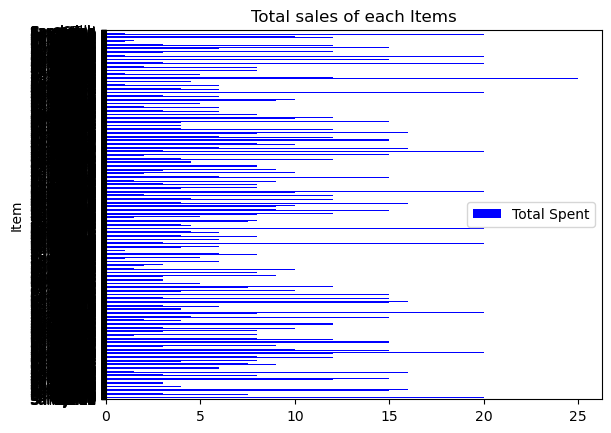

In [38]:
# Let's create an Dashboard
df.plot.barh(x='Item', y='Total Spent',
title = 'Total sales of each Items', color = 'Blue')

In [39]:
Total_REvenue_each_items = df.groupby(df['Item'])[['Total Spent']].sum().reset_index()
Total_REvenue_each_items = Total_REvenue_each_items.sort_values(by = "Total Spent", ascending = False)
Total_REvenue_each_items

,Item,Total Spent
4,Salad,6360.0
5,Sandwich,4772.0
6,Smoothie,4088.0
3,Juice,3735.0
0,Cake,3519.0
8,nan,3010.5
1,Coffee,2242.0
7,Tea,1726.5
2,Cookie,1163.0


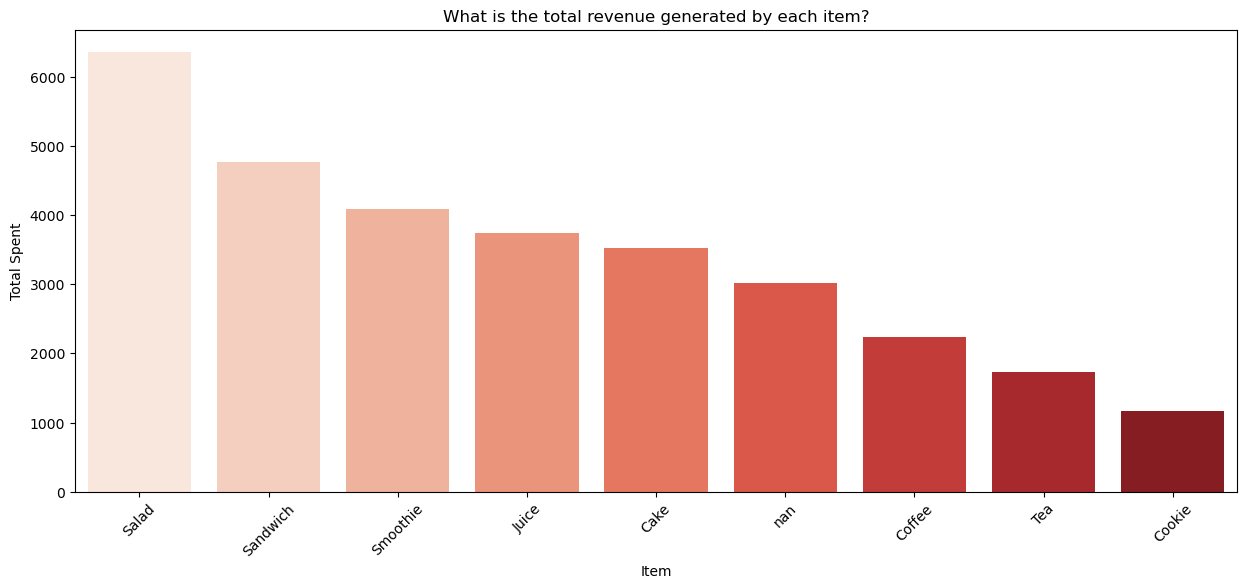

In [41]:
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
plt.figure(figsize = (15,6))
sns.barplot(x='Item', y='Total Spent', data = Total_REvenue_each_items, palette = 'Reds')
plt.title('What is the total revenue generated by each item?')
plt.xlabel('Item')
plt.ylabel('Total Spent')
plt.xticks(rotation=45)
plt.show()

In [42]:
df.dropna(subset=['Item'], inplace = True)
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 3427 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    3427 non-null   object        
 1   Item              3427 non-null   object        
 2   Quantity          3427 non-null   float64       
 3   Price Per Unit    3427 non-null   float64       
 4   Total Spent       3427 non-null   float64       
 5   Payment Method    3427 non-null   object        
 6   Location          3427 non-null   object        
 7   Transaction Date  3427 non-null   datetime64[ns]
 8   Day of the Week   3427 non-null   object        
 9   Month             3427 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 294.5+ KB


Transaction ID      0
Item                0
Quantity            0
Price Per Unit      0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
Day of the Week     0
Month               0
dtype: int64

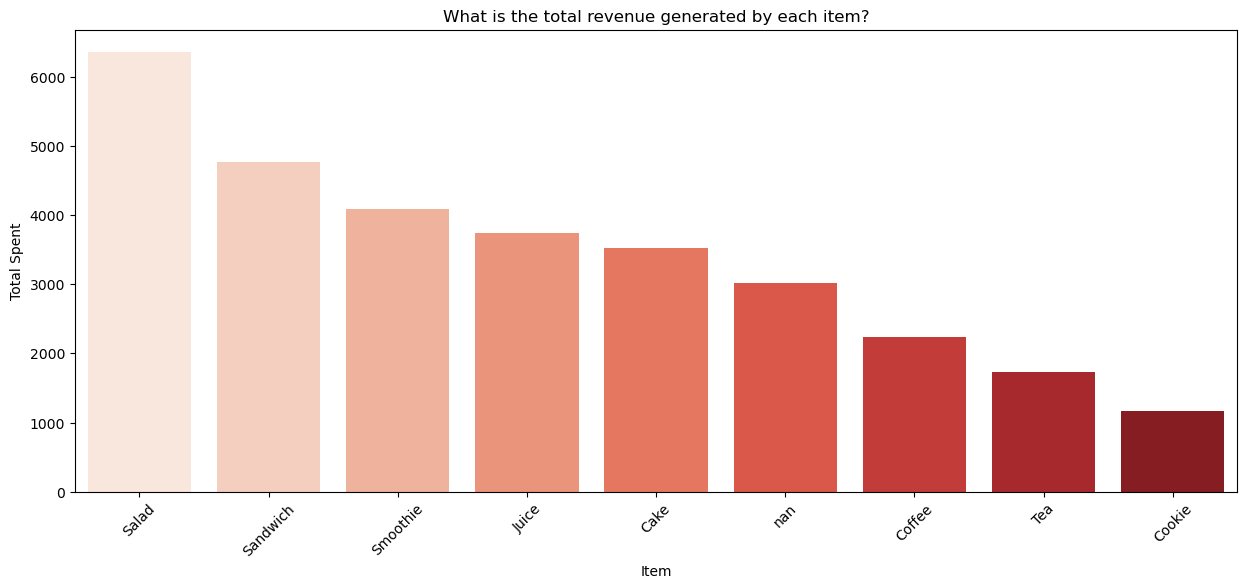

In [43]:
plt.figure(figsize = (15,6))
sns.barplot(x='Item', y='Total Spent', data = Total_REvenue_each_items, palette = 'Reds')
plt.title('What is the total revenue generated by each item?')
plt.xlabel('Item')
plt.ylabel('Total Spent')
plt.xticks(rotation=45)
plt.show()

In [44]:
categorical_columns = ['Item']
for column in categorical_columns:
    print(f"\nValue counts for '{column}':")
    print(df[column].value_counts(dropna=False))


Value counts for 'Item':
Item
Juice       427
Salad       418
Sandwich    391
Cookie      391
Cake        385
Tea         372
Coffee      367
Smoothie    338
nan         338
Name: count, dtype: int64


In [45]:
empty_item_df = df[df['Item'].isna()]
empty_item_df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,Day of the Week,Month


In [46]:
df.dropna()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,Day of the Week,Month
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08,Friday,September
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16,Tuesday,May
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11,Sunday,June
10,TXN_2548360,Salad,5.0,5.0,25.0,Cash,Takeaway,2023-11-07,Tuesday,November
12,TXN_7619095,Sandwich,2.0,4.0,8.0,Cash,In-store,2023-05-03,Wednesday,May
...,...,...,...,...,...,...,...,...,...,...
9975,TXN_9668108,Cake,1.0,3.0,3.0,Cash,In-store,2023-01-20,Friday,January
9979,TXN_9933628,Smoothie,5.0,4.0,20.0,Cash,In-store,2023-07-20,Thursday,July
9986,TXN_2858441,Sandwich,2.0,4.0,8.0,Credit Card,In-store,2023-12-14,Thursday,December
9991,TXN_3897619,Sandwich,3.0,4.0,12.0,Cash,Takeaway,2023-02-24,Friday,February


In [47]:
Total_sales_by_month = df.groupby(df['Month'])[['Total Spent']].sum().reset_index()
Total_sales_by_month = Total_sales_by_month.sort_values(by = "Total Spent", ascending = False)
Total_sales_by_month

,Month,Total Spent
4,January,2874.0
1,August,2698.5
6,June,2661.0
11,September,2616.5
9,November,2605.5
0,April,2566.5
5,July,2518.0
3,February,2507.5
10,October,2483.0
2,December,2468.0


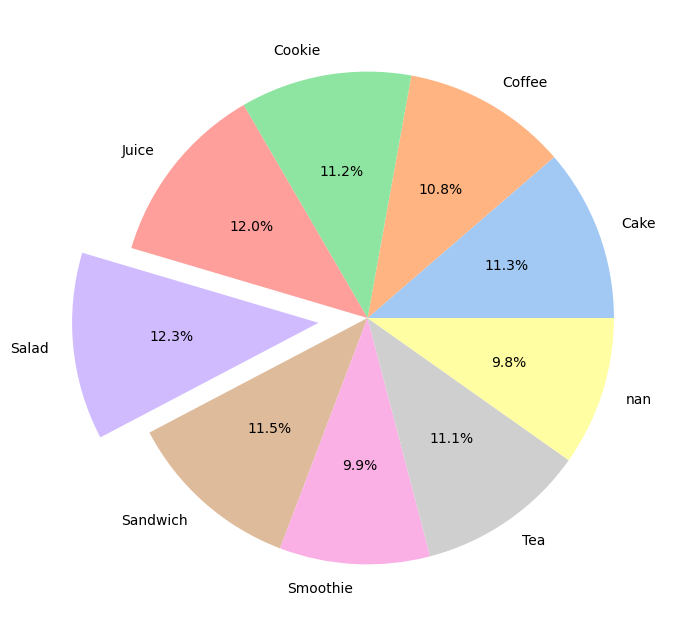

In [54]:
most_orderd_item = df.groupby('Item')[['Quantity']].sum().round().reset_index()
most_orderd_item

plt.figure(figsize=(8, 8))
colors = sns.color_palette('pastel')

explode = [0.2 if x == most_orderd_item['Quantity'].max() else 0 for x in most_orderd_item['Quantity']]
plt.pie(most_orderd_item['Quantity'], labels=most_orderd_item['Item'], autopct='%1.1f%%', colors=colors, explode=explode)
plt.show()

In [56]:
sales_by_day = df.groupby(df['Day of the Week'])['Total Spent'].sum().round(1).reset_index()
sales_by_day

,Day of the Week,Total Spent
0,Friday,4176.5
1,Monday,4714.0
2,Saturday,4417.0
3,Sunday,4530.5
4,Thursday,4536.5
5,Tuesday,4302.5
6,Wednesday,3939.0


In [57]:
highest_sales_day = sales_by_day.loc[sales_by_day['Total Spent'].idxmax()]
highest_sales_day

Day of the Week    Monday
Total Spent        4714.0
Name: 1, dtype: object

In [58]:
seasonal_spikes_by_month = df.groupby(['Month', 'Item'])['Total Spent'].sum().reset_index()
seasonal_spikes_by_month

,Month,Item,Total Spent
0,April,Cake,249.0
1,April,Coffee,172.0
2,April,Cookie,74.0
3,April,Juice,348.0
4,April,Salad,580.0
...,...,...,...
103,September,Salad,470.0
104,September,Sandwich,508.0
105,September,Smoothie,508.0
106,September,Tea,145.5
